# TD4 : Echantillonnage et quantification

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
def fonction_triangle(t):
    if (t >= -1) & (t <= 0):
        return 1 + t
    elif (t >= 0) & (t <= 1):
        return 1 - t
    else:
        return 0

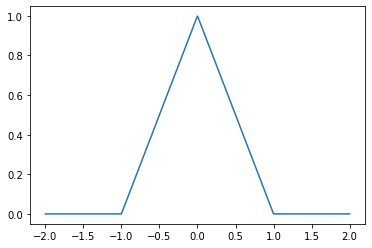

In [47]:
t = pd.Series(np.linspace(-2, 2, 1000))
plt.plot(t, t.apply(fonction_triangle))

## Exercice 1

La fonction triangle est définir par : 

$$
x(t) = \begin{cases} 1 + t & \text{si} \ -1 \leq t \leq 0 \\ 1 - t & \text{si} \ 0 \leq t \leq 1 \\ 0 & \text{sinon} \end{cases}
$$

### Question 1
Calculer sa transformée de Fourier.

Par définition : 
$$
\forall f \in \mathbb{R}, X(f) = \int_{-\infty}^{+\infty}x(t)\exp(-i2\pi ft)dt
$$

En utilisant une intégration par partie :
$$
\begin{align*}
X(f) &= \int_{-1}^{0}x(t)\exp(-i2\pi ft)dt + \int_{0}^{1}x(t)\exp(-i2\pi ft)dt \\
&= \int_{-1}^{0}(1+t)\exp(-i2\pi ft)dt + \int_{0}^{1}(1-t)\exp(-i2\pi ft)dt \\
\end{align*}
$$

Intégration par partie
$$
\int uv'dx = [uv] - \int u'vdx \\
\text{avec}
\begin{cases}
u = 1+t\\
u' = 1 \\
v' = \exp(-i2\pi ft)\\
v = \frac{\exp(-i2\pi ft)}{-2i\pi f}
\end{cases}
$$
$$
\begin{align*}
\int_{-1}^0(1+t)\exp(-i2\pi ft)dt &= \left[(1+t)\frac{\exp(-i2\pi ft)}{-2i\pi f} \right]_{-1}^0 - \int_{-1}^0 \frac{\exp(-i2\pi ft)}{-2i\pi f}dt \\
								  &= \frac{1}{-2i\pi f} + \frac{1}{2i\pi f}\int_{-1}^0 \exp(-2i\pi ft)dt \\
								  &= \frac{1}{-2i\pi f} + \frac{1}{2i\pi f}\left[ \frac{\exp(-i2\pi ft)}{-2i\pi f} \right]_{-1}^0 \\
								  &= \frac{1}{-2i\pi f} + \frac{1}{2i\pi f}\left( \frac{\exp(0)}{-2i\pi f} - \frac{\exp(i2\pi f)}{-2i\pi f} \right) \\
								  &= \frac{1}{-2i\pi f} + \frac{1}{-2^2i^2\pi^2 f^2}\left(1 - \exp(i2\pi f)\right) \\
								  &= \frac{i}{2\pi f} + \frac{1}{4\pi^2 f^2}- \frac{\exp(i2\pi f)}{4\pi^2 f^2}
\end{align*}
$$

Intégration par partie
$$
\int uv'dx = [uv] - \int u'vdx \\
\text{avec}
\begin{cases}
u = 1-t\\
u' = -1 \\
v' = \exp(-i2\pi ft)\\
v = \frac{\exp(-i2\pi ft)}{-2i\pi f}
\end{cases}
$$
$$
\begin{align*}
\int_0^1(1-t)\exp(-i2\pi ft)dt &= \left[(1-t)\frac{\exp(-i2\pi ft)}{-2i\pi f} \right]_0^1 - \int_0^1 -1*\frac{\exp(-i2\pi ft)}{-2i\pi f}dt \\
								  &= \frac{1}{2i\pi f} - \frac{1}{2i\pi f}\int_0^1 \exp(-2i\pi ft)dt \\
								  &= \frac{1}{-2i\pi f} - \frac{1}{2i\pi f}\left[ \frac{\exp(-i2\pi ft)}{-2i\pi f} \right]_0^1 \\
								  &= \frac{1}{2i\pi f} - \frac{1}{2i\pi f}\left(\frac{\exp(-i2\pi f)}{-2i\pi f}  - \frac{\exp(0)}{-2i\pi f} \right) \\
								  &= \frac{1}{2i\pi f} - \frac{1}{-2^2i^2\pi^2 f^2}\left(\exp(-i2\pi f) - 1 \right) \\
								  &= -\frac{i}{2\pi f} + \frac{1}{4\pi^2 f^2}- \frac{\exp(-i2\pi f)}{4\pi^2 f^2}
\end{align*}
$$

On s'appuie sur les formules suivantes :

- Formule d'Euler : $\cos(x) = \frac{\exp^{ix}+\exp{-ix}}{2}$
- Linéarisation : $\cos(2x) = 1 - 2\sin^2(x)\Rightarrow \sin^2(x) = \frac{1-\cos(2x)}{2}$
- Sinus cardinal : $sinc(x) = \frac{\sin(x)}{x}$

On a ainsi $\forall t \neq 0 $:
$$
\begin{align*}
X(f) &= \frac{i}{2\pi f} + \frac{1}{4\pi^2 f^2}- \frac{\exp(i2\pi f)}{4\pi^2 f^2} -\frac{i}{2\pi f} + \frac{1}{4\pi^2 f^2}- \frac{\exp(-i2\pi f)}{4\pi^2 f^2} \\
&= \frac{2}{4\pi^2f^2} - \frac{\exp(i2\pi f) + \exp(-i2\pi f)}{4\pi^2f^2} \\
&= \frac{2\cos(2\pi f) - 2}{-4\pi^2f^2} \\
&= \frac{\cos(2\pi f)-1}{-2\pi^2f^2}\\
&= \frac{\sin^2(\pi f)}{\pi^2f^2} \\
&= \left( \frac{\sin(\pi f)}{\pi f} \right)^2 \\
&= (sinc(\pi f))^2
\end{align*}
$$

Pour $t \neq 0$ :
$$
\begin{align*}
X(0) &= \int_{-\infty}^{+\infty} x(t)\exp(-i2\pi 0t)dt \\
&= \int_{-1}^1 x(t) dt \\
&= 1
\end{align*}
$$

Au final :
$$
X(f) = \begin{cases} (sinc(\pi f))^2, & t\neq 0 \\ 1, & t=0 \end{cases}
$$

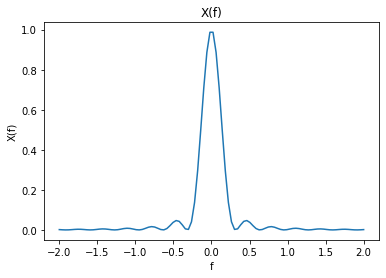

In [27]:
x = np.linspace(-2, 2, 100)
y = (np.sinc(np.pi * x))**2
plt.plot(x, y)
plt.title("X(f)")
plt.xlabel('f')
plt.ylabel('X(f)')
plt.show()

### Question 2
Quelle fréquence d’échantillonnage devrait-on choisir pour ce signal? 

D'après le théorème de Nyquist-Shannon, il faut choisir la fréquence d'échantillonnage $F_e$ telle que :
$$
F_e \geq 2f_{max}
$$
Hors $\forall f : X(f)>0$, ce qui empèche l'application de ce théorème puisqu'il n'existe pas de fréquence maximale $f_{max}$ dans le signal correspondant à la fonction triangle.


### Question 3
On considère qu’une fréquence d’échantillonnage Fe est raisonnable si : 
$$
\forall f \geq F_e, \left| \frac{X(f)}{X(0}\right| \leq 10^{-2}
$$
Calculer Fe puis représenter graphiquement le signal échantillonné.

$$
\begin{align*}
	\forall f \geq F_e : \left| \frac{X(f)}{X(0)} \right| &\leq 10^{-2} \\
	\left|\frac{X(f)}{1}\right| &\leq 10^{-2} \\
	\left|X(f)\right| &\leq 10^{-2} \\
	\left|\frac{\sin(\pi f)}{\pi f}\right| &\leq 10^{-2} \\
	\left|\frac{\sin(\pi f)}{f}\right| &\leq \pi10^{-2} \\
\end{align*}
$$

On peut considérer la valeur maximale que peut prendre $|sin(\pi f)|$ qui est de 1 pour simplifier les calculs. Sachant que $f > 0$ :

$$
\begin{align*}
	\left|\frac{\sin(\pi f)}{f}\right| &\leq \pi10^{-2} \\
	\frac{1}{f} &\leq \pi10^{-2} \\
	f &\geq \frac{1}{\pi10^{-2}} \\
	f &\geq 31.83\text{Hz}
\end{align*}
$$


In [76]:
f = 1/(np.pi * 1e-2)

In [77]:
start = -2
end = 2
t = pd.Series(np.linspace(start, end, int(np.ceil((end-start)*f))))

Text(0.5, 1.0, 'Fonction triangle avec $F_e = $31.83Hz')

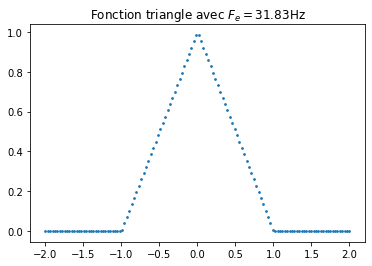

In [78]:
plt.scatter(t, t.apply(fonction_triangle), s=3)
plt.title('Fonction triangle avec $F_e = ${:.2f}Hz'.format((f)))

## Exercice 2
### Question 1
Calculer la puissance moyenne du signal s

$$
\begin{align*}
	P(s) &= \frac{1}{T}\int_{-\frac{T}{2}}^{\frac{T}{2}}\left|s(t)^2\right|dt \\
		 &= \frac{1}{T}\int_{-\frac{T}{2}}^{\frac{T}{2}}  \left|t^2\right|dt \\
		 &= \frac{1}{T}\int_{-\frac{T}{2}}^{\frac{T}{2}} t^2 dt \\
		 &= \frac{1}{T}\left[\frac{t^3}{3}\right]_{-\frac{T}{2}}^{\frac{T}{2}} \\
		 &= \frac{1}{1}\left(\frac{0.5^3}{3} - \frac{(-0.5)^3}{3}\right) \\
		 &= 0.0833
\end{align*}
$$

In [327]:
P1 = (0.5**3)/3 - ((-0.5)**3)/3
P1

0.08333333333333333

### Question 2
On considère une quantiﬁcation du signal uniforme et par défaut, avec un pas de quantiﬁcation q = 1/n. Tracer le signal quantiﬁé pour n = 5.

In [310]:
n = 5
q = 1/n
t = np.arange(-2, 2, q)
s_t = (t + 0.5) % 1 - 0.5

n2 = 1000
q2 = 1/n2
t2 = np.arange(-2, 2, q2)
s_t2 = (t2 + 0.5) % 1 - 0.5

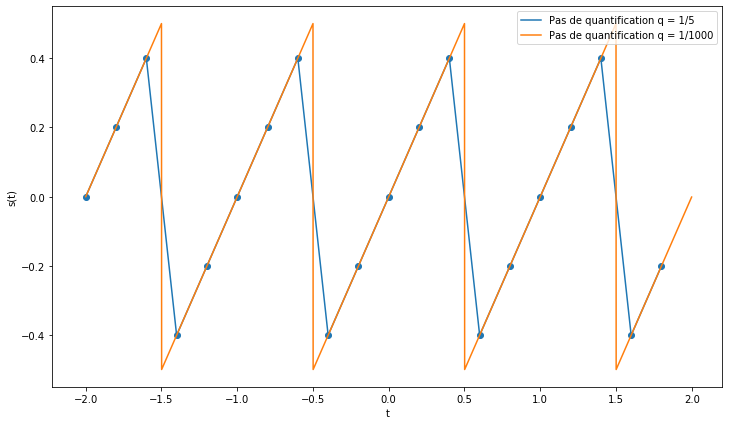

In [311]:
plt.figure(figsize=(12,7))
plt.plot(t, s_t, label='Pas de quantification q = 1/{}'.format(n))
plt.scatter(t, s_t)
plt.plot(t2, s_t2,label= 'Pas de quantification q = 1/{}'.format(n2))
plt.xlabel('t')
plt.ylabel('s(t)')
plt.legend()

### Question 3
En déduire que l’erreur de quantiﬁcation e est également un signal en dents de scie dont on précisera l’amplitude et la période. 

L'erreur de quantification apparaît sur le delta de temps non couvert par la quantification utilisée et pour lequel la pente change. 
Par exemple, sur l'intervalle $[2q, 3q]$, qui correspond au "saut", on observe une erreur liée à la quantification utilisée.
La période est la même que celle du signal de référence soit 1, et l'amplitude est de $s\left(\frac{T}{2}\right) = \frac{1}{2}$


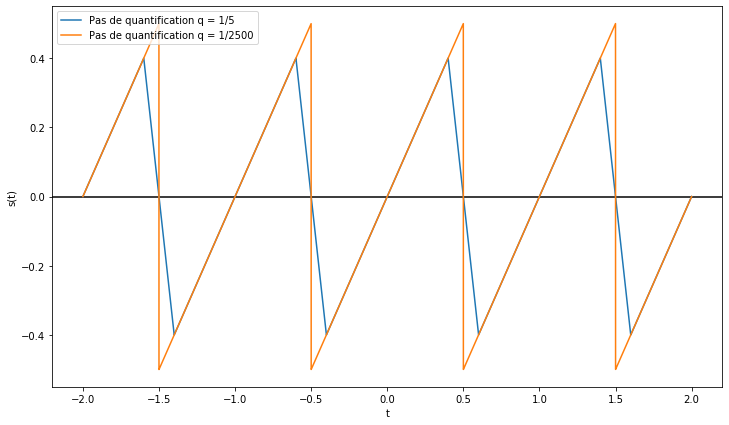

In [312]:
t = np.linspace(-2,2,10000)
s_t1 = [(i+0.5)%1 - 0.5 if (i%1 < 2*q) | (i%1 >= 3*q) else 2*q*(1 - 2*((i%1)/q)%2) for i in t]
s_t2 = (t + 0.5) % 1 - 0.5
plt.figure(figsize=(12,7))
plt.axhline(0, c='k')
plt.plot(t, s_t1, label='Pas de quantification q = 1/{}'.format(n))
plt.plot(t, s_t2, label='Pas de quantification q = 1/{}'.format(2500))
plt.legend()
plt.xlabel('t')
plt.ylabel('s(t)')
plt.show()

Text(0.5, 1.0, 'Erreur de quantification entre q = 1/5 et q = 1/2500')

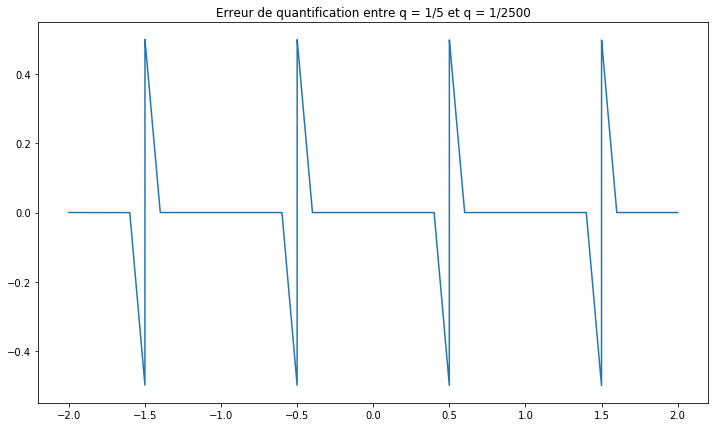

In [313]:
plt.figure(figsize=(12,7))
plt.plot(t, s_t1 - s_t2)
plt.title('Erreur de quantification entre q = 1/5 et q = 1/2500')

In [314]:
np.linspace(0,5,20)%2

array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
       1.31578947, 1.57894737, 1.84210526, 0.10526316, 0.36842105,
       0.63157895, 0.89473684, 1.15789474, 1.42105263, 1.68421053,
       1.94736842, 0.21052632, 0.47368421, 0.73684211, 1.        ])

### Question 4
Calculer le rapport signal sur bruit dû à une quantiﬁcation de pas q.

Soit $e(t)$ l'erreur de quantification en fonction de $t$. Il faut calculer la puissance du signal correspondant à cette erreur.
$$
\begin{align*}
	P(s) &= \frac{1}{T}\int_{-\frac{T}{2}}^{\frac{T}{2}}\left|s(t)^2\right|dt \\
		 &= \frac{1}{T}\left[\int_{-\frac{T}{2}}^{-2q}|e(t)|^2dt + \int_{2q}^{-\frac{T}{2}}|e(t)|^2dt\right] \\
		 &= \frac{1}{T}*2\int_{2q}^{\frac{T}{2}} \left(\frac{1/2}{T/2 - 2q}(t-2q)\right)^2dt \\
		 &= \frac{1}{T} *2\int_0^{\frac{1}{2}q} \left(\frac{1/2}{(1/2)(1/5)}t\right)^2dt \\
		 &= \frac{1}{T} *2\int_0^{\frac{1}{2}q}\left(5t\right)^2dt \\
		 &= \frac{1}{T} *2\int_0^{\frac{1}{2}q}25t^2dt \\
		 &= \frac{1}{T} *2*25\left[\frac{t^3}{3}\right]_0^{\frac{1}{2}q} \\
		 &= \frac{1}{T} *50\frac{\left(\frac{1}{2}q\right)^3}{3} \\
		 &= \frac{1}{T}50\frac{\left(\frac{1}{10}\right)^3}{3} \\
		 &=50*10^{-3}/3 \\
		 &=
\end{align*}
$$

In [328]:
P0 = 50 * 1e-3/3
P0

0.016666666666666666

In [329]:
SNR = 10*np.log10(P1/P0)
print('SNR = {:.2f}dB'.format(SNR))

SNR = 6.99dB


### Question 5
Pour un produit audio, on considère que la qualité est « bonne » à partir d’un SNR de 60 dB. Combien de bits faut-il disposer pour garantir un rapport signal sur bruit supérieur à 60 dB?
